In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
disaster_fema = pd.read_csv('../data/disaster_data.csv')

In [4]:
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [5]:
disaster_fema['State'] = disaster_fema['state'].map(state_abbreviations)

In [6]:
disaster_fema = disaster_fema.drop_duplicates().reset_index(drop = True)

In [7]:
disaster_fema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   disasterNumber     3184 non-null   int64 
 1   state              3184 non-null   object
 2   declarationType    3184 non-null   object
 3   declarationDate    3184 non-null   object
 4   fyDeclared         3184 non-null   int64 
 5   incidentType       3184 non-null   object
 6   declarationTitle   3184 non-null   object
 7   incidentBeginDate  3184 non-null   object
 8   incidentEndDate    2907 non-null   object
 9   fipsStateCode      3184 non-null   int64 
 10  State              3073 non-null   object
dtypes: int64(3), object(8)
memory usage: 273.8+ KB


In [8]:
disaster_fema['declarationDate'] = pd.to_datetime(disaster_fema['declarationDate']).dt.date
disaster_fema['incidentBeginDate'] = pd.to_datetime(disaster_fema['incidentBeginDate']).dt.date
disaster_fema['incidentEndDate'] = pd.to_datetime(disaster_fema['incidentEndDate']).dt.date

In [9]:
disaster_fema['declarationDate'] = pd.to_datetime(disaster_fema['declarationDate'])
disaster_fema['incidentBeginDate'] = pd.to_datetime(disaster_fema['incidentBeginDate'])
disaster_fema['incidentEndDate'] = pd.to_datetime(disaster_fema['incidentEndDate'])

In [10]:
disaster_fema = disaster_fema[~disaster_fema['incidentType'].isin(['Other', 'Terrorist'])]

In [11]:
disaster_fema.to_csv('disaster_fema.csv', index=False)

In [12]:
state_size = pd.read_csv('../data/state_area.csv')

In [13]:
oshkoshbigosh = pd.merge( disaster_fema,state_size,
         left_on = 'State',
         right_on = 'State',
         how = 'outer')

In [14]:
oshkoshbigosh.groupby('State')['total_area_sq_miles']

In [15]:
state_disasters = oshkoshbigosh['State'].value_counts().reset_index()

In [16]:
huh = pd.merge( state_disasters,state_size,
         left_on = 'State',
         right_on = 'State',
         how = 'outer')

In [17]:
huh['total_area_sq_miles']=huh['total_area_sq_miles'].str.replace(',','')

In [18]:
huh['total_area_sq_miles']=huh['total_area_sq_miles'].astype(float)

In [19]:
huh['disasters_per_1000_sq_mi'] = (huh['count']/huh['total_area_sq_miles'])*1000

In [20]:
huh.to_csv('disasters_and_state_area.csv')

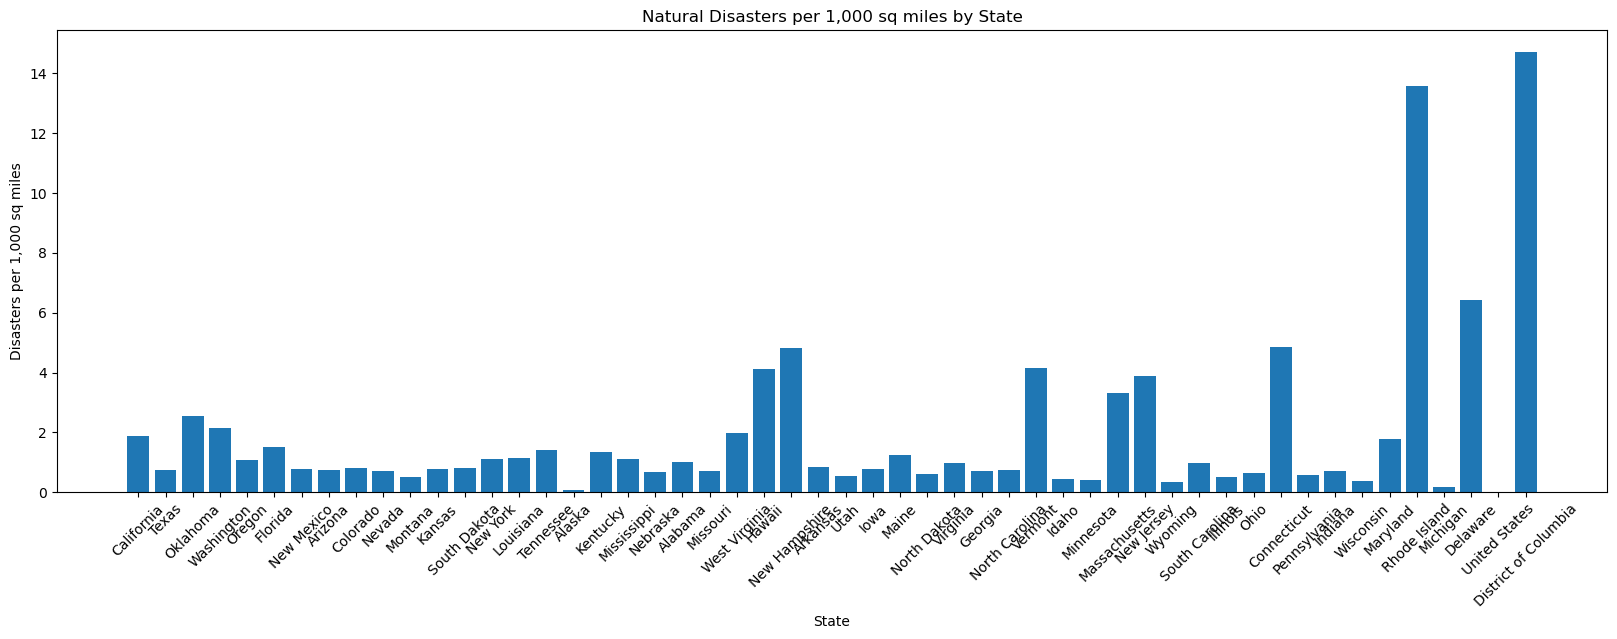

In [21]:
plt.figure(figsize=(20, 6))
plt.bar(huh['State'], huh['disasters_per_1000_sq_mi'])
plt.xlabel('State')
plt.ylabel('Disasters per 1,000 sq miles')
plt.title('Natural Disasters per 1,000 sq miles by State')
plt.xticks(rotation=45)
plt.show()

In [22]:
insurance_avg_by_home_price = pd.read_csv('../data/state_avg_by_home_price.csv')

In [23]:
insurance_avg_by_home_price = insurance_avg_by_home_price.rename( columns = {'Average annual rates for $200,000 in dwelling coverage' : 'avg_annual_rate_$200,000',
                         'Average annual rates for $300,000 in dwelling coverage' : 'avg_annual_rate_$300,000',
                         'Average annual rates for $400,000 in dwelling coverage' : 'avg_annual_rate_$400,000',
                         'Average annual rates for $600,000 in dwelling coverage' : 'avg_annual_rate_$600,000',
                         'Average annual rates for $1,000,000 in dwelling coverage' : 'avg_annual_rate_$1,000,000'})

In [24]:
merged_df = pd.merge(insurance_avg_by_home_price, huh, on='State')


In [25]:
merged_df['avg_annual_rate_$200,000'] = merged_df['avg_annual_rate_$200,000'].str.replace('$','').str.replace(',','')
merged_df['avg_annual_rate_$300,000'] = merged_df['avg_annual_rate_$300,000'].str.replace('$','').str.replace(',','')
merged_df['avg_annual_rate_$400,000'] = merged_df['avg_annual_rate_$400,000'].str.replace('$','').str.replace(',','')
merged_df['avg_annual_rate_$600,000'] = merged_df['avg_annual_rate_$600,000'].str.replace('$','').str.replace(',','')
merged_df['avg_annual_rate_$1,000,000'] = merged_df['avg_annual_rate_$1,000,000'].str.replace('$','').str.replace(',','')

In [26]:
merged_df['avg_annual_rate_$200,000']=merged_df['avg_annual_rate_$200,000'].astype(float)
merged_df['avg_annual_rate_$300,000']=merged_df['avg_annual_rate_$300,000'].astype(float)
merged_df['avg_annual_rate_$400,000']=merged_df['avg_annual_rate_$400,000'].astype(float)
merged_df['avg_annual_rate_$600,000']=merged_df['avg_annual_rate_$600,000'].astype(float)
merged_df['avg_annual_rate_$1,000,000']=merged_df['avg_annual_rate_$1,000,000'].astype(float)

In [27]:
relevant_columns = ['avg_annual_rate_$200,000', 'avg_annual_rate_$300,000', 
                     'avg_annual_rate_$400,000', 'avg_annual_rate_$600,000', 
                     'avg_annual_rate_$1,000,000', 'count']
data_for_correlation = merged_df[relevant_columns]

correlation_matrix = data_for_correlation.corr()

disaster_correlations = correlation_matrix['count']

In [28]:
relevant_columns_2 = ['avg_annual_rate_$200,000', 'avg_annual_rate_$300,000', 
                     'avg_annual_rate_$400,000', 'avg_annual_rate_$600,000', 
                     'avg_annual_rate_$1,000,000', 'disasters_per_1000_sq_mi']
data_for_correlation_2 = merged_df[relevant_columns_2]

correlation_matrix_2 = data_for_correlation_2.corr()

disaster_correlations_2 = correlation_matrix_2['disasters_per_1000_sq_mi']

In [29]:
disaster_correlations

avg_annual_rate_$200,000      0.191133
avg_annual_rate_$300,000      0.203447
avg_annual_rate_$400,000      0.210225
avg_annual_rate_$600,000      0.204481
avg_annual_rate_$1,000,000    0.169452
count                         1.000000
Name: count, dtype: float64

In [30]:
disaster_correlations_2

avg_annual_rate_$200,000     -0.269541
avg_annual_rate_$300,000     -0.280409
avg_annual_rate_$400,000     -0.284686
avg_annual_rate_$600,000     -0.281942
avg_annual_rate_$1,000,000   -0.295111
disasters_per_1000_sq_mi      1.000000
Name: disasters_per_1000_sq_mi, dtype: float64

In [31]:
cutoff_date = datetime.now() - pd.DateOffset(years=10)

In [32]:
recent_disasters = disaster_fema[disaster_fema['incidentBeginDate'] >= cutoff_date]

In [33]:
disaster_counts = recent_disasters.groupby('State').size()

In [34]:
states_with_few_disasters = disaster_counts[disaster_counts <= 5]

D:\internets\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


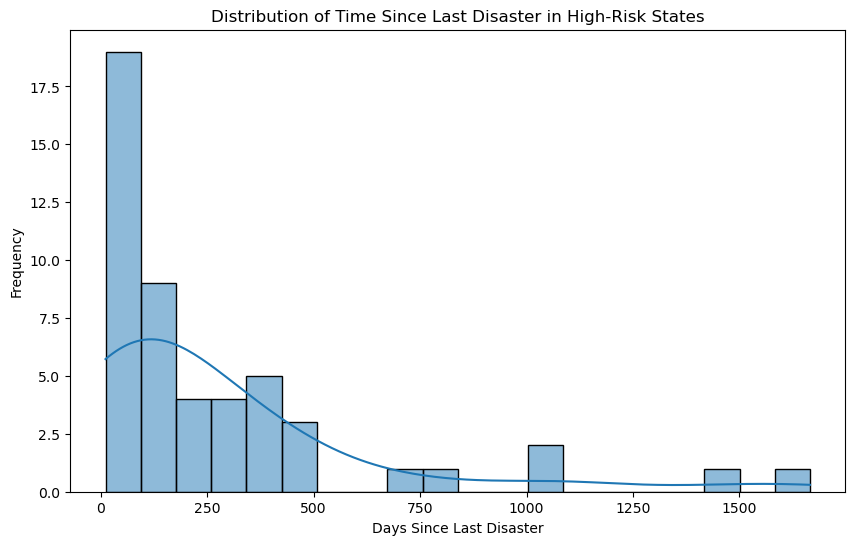

High-risk states and days since last disaster:
                         State  Days Since Last Disaster
State                                                   
Alabama                Alabama                       507
Alaska                  Alaska                       266
Arizona                Arizona                        33
Arkansas              Arkansas                        80
California          California                        18
Colorado              Colorado                        13
Connecticut        Connecticut                       215
Delaware              Delaware                      1076
Florida                Florida                        11
Georgia                Georgia                       348
Hawaii                  Hawaii                       123
Idaho                    Idaho                        18
Illinois              Illinois                       330
Indiana                Indiana                       500
Iowa                      Iowa           

In [35]:
disaster_counts = disaster_fema.groupby('State').size()

# Define high-risk states based on disaster count (e.g., more than 2 disasters)
high_risk_states = disaster_counts[disaster_counts > 2].index.tolist()

# Filter for high-risk states
high_risk_disasters = disaster_fema[disaster_fema['State'].isin(high_risk_states)]

# Find the last disaster date for each high-risk state
last_disaster_dates = high_risk_disasters.groupby('State')['incidentBeginDate'].max()

# Define the cutoff date for analysis
current_date = datetime.now()

# Calculate time since last disaster
time_since_last_disaster = current_date - last_disaster_dates

# Convert time gaps to days
time_since_last_disaster_days = time_since_last_disaster.dt.days

# Plot distribution of time since last disaster
plt.figure(figsize=(10, 6))
sns.histplot(time_since_last_disaster_days, bins=20, kde=True)
plt.title('Distribution of Time Since Last Disaster in High-Risk States')
plt.xlabel('Days Since Last Disaster')
plt.ylabel('Frequency')
plt.show()

# Display states and time since last disaster
print("High-risk states and days since last disaster:")
print(pd.DataFrame({'State': last_disaster_dates.index, 'Days Since Last Disaster': time_since_last_disaster_days}))

In [36]:
huh['count'].describe()

count     52.000000
mean      58.769231
std       51.927406
min        1.000000
25%       33.250000
50%       45.000000
75%       60.500000
max      307.000000
Name: count, dtype: float64

In [37]:
oshkoshbigosh['year'] = oshkoshbigosh['incidentBeginDate'].dt.year

In [38]:
disasters_per_year = oshkoshbigosh.groupby('State')['year'].value_counts().reset_index()

In [39]:
disasters_per_year[disasters_per_year['State'] == 'California'].sort_values(by = 'year')

,State,year,count
108,California,2000.0,1
95,California,2002.0,12
91,California,2003.0,18
87,California,2004.0,23
97,California,2005.0,10
101,California,2006.0,9
88,California,2007.0,20
89,California,2008.0,18
98,California,2009.0,10
100,California,2010.0,9


In [40]:
disaster_numbers = disaster_fema['incidentType'].value_counts().reset_index()

In [41]:
delete_these = ['Toxic Substances','Chemical','Dam/Levee Break']
disaster_numbers = disaster_numbers[~disaster_numbers['incidentType'].isin(delete_these)]


<Axes: xlabel='count', ylabel='incidentType'>

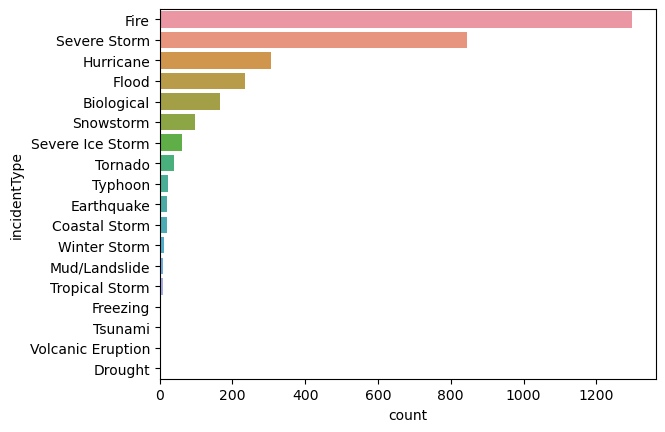

In [42]:
sns.barplot(disaster_numbers, y= 'incidentType', x='count')

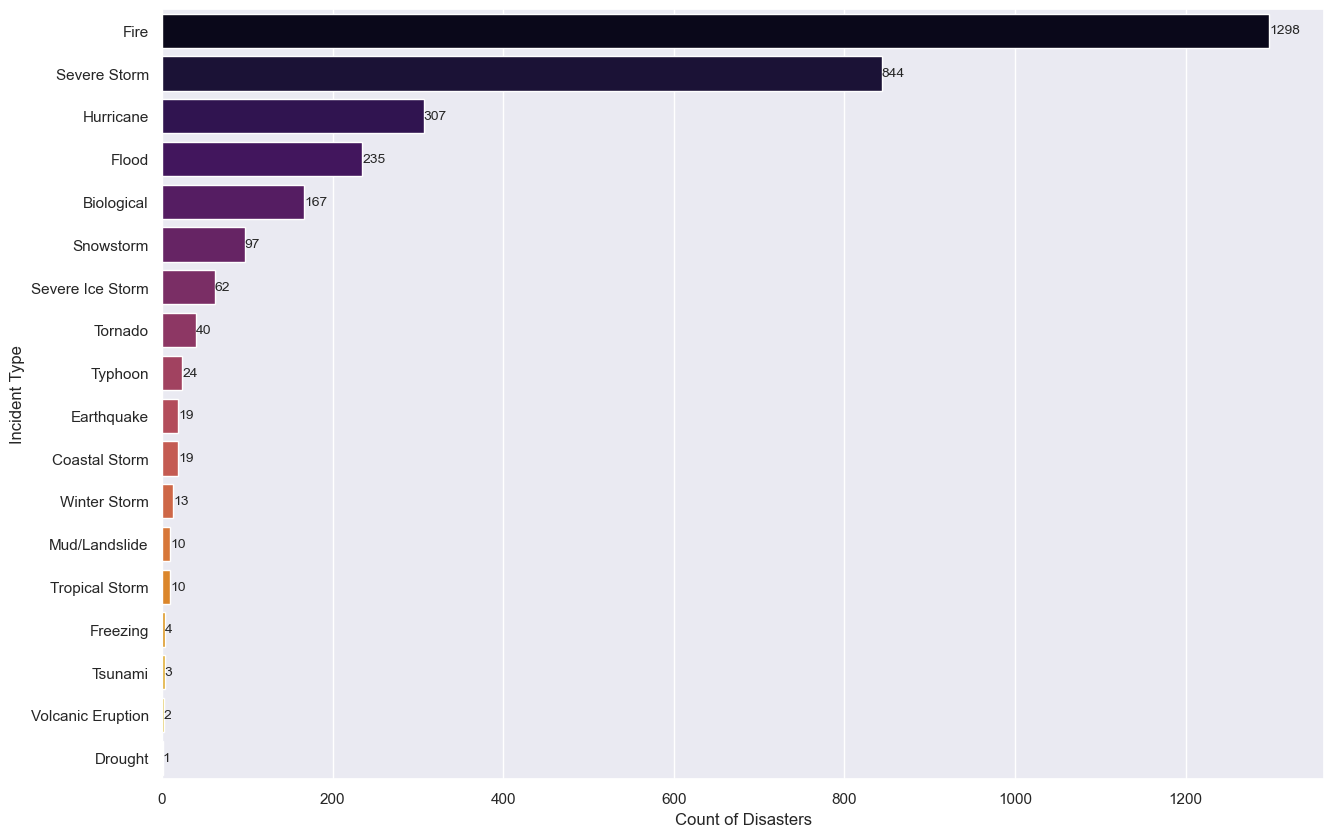

In [43]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(15,10))
ax = sns.barplot(disaster_numbers, x="count", y="incidentType",palette = 'inferno', estimator="sum", errorbar=None)
ax.set(xlabel='Count of Disasters', ylabel='Incident Type')
ax.bar_label(ax.containers[0], fontsize=10);

In [44]:
huh['count'].describe()

count     52.000000
mean      58.769231
std       51.927406
min        1.000000
25%       33.250000
50%       45.000000
75%       60.500000
max      307.000000
Name: count, dtype: float64

In [45]:
huh['count'] = pd.to_numeric(huh['count'], errors='coerce')

def categorize_risk(count):
    if count <= 33:
        return 'Low Risk'
    elif count <= 66:
        return 'Medium Risk'
    else:
        return 'High Risk'

huh['risk'] = huh['count'].apply(categorize_risk)

In [46]:
disasters_per_year = disasters_per_year.rename(columns={'count': 'disasters_per_year'})

In [47]:
huh = huh.rename(columns = {'count' : 'total_disasters'})

In [48]:
merged_per_year_risk = pd.merge(disasters_per_year, huh, on='State')

In [49]:
to_merge = oshkoshbigosh[['State','year','incidentBeginDate']]

In [50]:
test = pd.merge(to_merge,merged_per_year_risk,on = ['State','year'])

In [51]:
current_date = pd.Timestamp.now()
test['days_since_incident'] = (current_date - test['incidentBeginDate']).dt.days

In [52]:
test.describe()

,year,incidentBeginDate,disasters_per_year,total_disasters,total_area_sq_miles,disasters_per_1000_sq_mi,days_since_incident
count,3054.000000,3054,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000
mean,2011.997380,2012-06-24 02:07:46.797642240,7.705959,103.836280,100800.012115,1.489108,4431.911264
min,1999.000000,1999-08-06 00:00:00,1.000000,16.000000,1545.000000,0.084162,11.000000
25%,2006.000000,2006-06-02 12:00:00,2.000000,45.000000,52420.000000,0.736907,1979.000000
50%,2011.000000,2011-09-04 00:00:00,4.000000,62.000000,71298.000000,1.011064,4726.000000
75%,2019.000000,2019-03-13 00:00:00,9.000000,152.000000,113990.000000,1.875439,6645.500000
max,2024.000000,2024-08-01 00:00:00,57.000000,307.000000,665384.000000,13.592233,9138.000000
std,7.058596,NaN,9.585616,84.606447,99819.103441,1.472368,2569.091560


In [53]:
high_risk_accidents = test[test['risk'] == 'High Risk']

In [54]:
medium_risk_accidents = test[test['risk'] == 'Medium Risk']

In [55]:
low_risk_accidents = test[test['risk'] == 'Low Risk']

In [56]:
high_risk_plot = high_risk_accidents.groupby('State')['days_since_incident'].min().sort_values().reset_index()

In [57]:
medium_risk_plot = medium_risk_accidents.groupby('State')['days_since_incident'].min().sort_values().reset_index()

In [58]:
low_risk_plot = low_risk_accidents.groupby('State')['days_since_incident'].min().sort_values().reset_index()

In [59]:
high_risk_plot.to_csv('high_risk_plot.csv', index=False)

In [60]:
medium_risk_plot.to_csv('medium_risk_plot.csv', index=False)

In [61]:
low_risk_plot.to_csv('low_risk_plot.csv', index=False)

In [62]:
medium_risk_accidents.groupby('State')['days_since_incident'].min()

State
Alabama           507
Alaska            266
Arkansas           80
Georgia           348
Hawaii            123
Idaho              18
Iowa               57
Kansas            109
Kentucky           83
Louisiana         348
Maine             131
Massachusetts     332
Minnesota          57
Mississippi       126
Missouri           85
Nebraska          109
New Hampshire     131
New Jersey        395
New York          319
North Carolina    684
North Dakota      231
South Dakota      491
Tennessee          96
Utah               36
Vermont           216
Virginia          761
West Virginia     123
Wyoming            13
Name: days_since_incident, dtype: int64

In [63]:
medium_risk_accidents.groupby('State').agg({'incidentBeginDate': 'max','disasters_per_year': 'mean'})

,incidentBeginDate,disasters_per_year
State,,
Alabama,2023-03-24,4.207547
Alaska,2023-11-20,3.321429
Arkansas,2024-05-24,3.177778
Georgia,2023-08-30,3.333333
Hawaii,2024-04-11,3.488889
Idaho,2024-07-25,2.945946
Iowa,2024-06-16,3.045455
Kansas,2024-04-25,4.206349
Kentucky,2024-05-21,3.036364


In [64]:
high_risk_accidents.groupby('State').agg({'incidentBeginDate': 'max','disasters_per_year': 'mean'})

,incidentBeginDate,disasters_per_year
State,,
Arizona,2024-07-10,5.047619
California,2024-07-25,16.693811
Colorado,2024-07-30,7.867470
Florida,2024-08-01,7.242424
Montana,2024-07-09,5.181818
Nevada,2024-07-16,4.766234
New Mexico,2024-06-17,6.473684
Oklahoma,2024-05-19,14.101124
Oregon,2024-07-21,8.140187


In [65]:
disaster_fema['incidentType'].value_counts()

incidentType
Fire                 1298
Severe Storm          844
Hurricane             307
Flood                 235
Biological            167
Snowstorm              97
Severe Ice Storm       62
Tornado                40
Typhoon                24
Earthquake             19
Coastal Storm          19
Winter Storm           13
Mud/Landslide          10
Tropical Storm         10
Dam/Levee Break         4
Freezing                4
Tsunami                 3
Volcanic Eruption       2
Chemical                1
Toxic Substances        1
Drought                 1
Name: count, dtype: int64

In [66]:
disaster_types = [
    'Fire', 'Severe Storm', 'Hurricane', 'Flood', 'Biological', 'Snowstorm', 
    'Severe Ice Storm', 'Tornado','TORNADOES', 'Typhoon', 'Earthquake', 'Coastal Storm', 
    'Winter Storm', 'Mud/Landslide', 'Tropical Storm', 'Dam/Levee Break', 
    'Freezing', 'Tsunami', 'Volcanic Eruption', 'Chemical', 'Toxic Substances', 
    'Drought']

In [67]:
disaster_types_pattern = '|'.join([re.escape(dtype) for dtype in disaster_types])

In [68]:
specific_mappings = {
    'COVID-19': 'BIOLOGICAL',
    'Coastal Storm': 'COASTAL STORM',  
    'Tropical Storm': 'COASTAL STORM',  
    'Dam/Levee Break': 'FLOOD',
    'TORNADOES': 'TORNADO'}

In [69]:
def extract_disaster_types(declaration_title):
    found_types = re.findall(disaster_types_pattern, declaration_title, re.IGNORECASE)    
    for term, dtype in specific_mappings.items():
        if term.lower() in declaration_title.lower():
            found_types.append(dtype)  
    found_types = ['Storm' if dtype in ['Coastal Storm', 'Tropical Storm'] else
                   'Flood' if dtype == 'Dam/Levee Break' else dtype for dtype in found_types]  
    return list(set(found_types))

In [70]:
disaster_fema['extractedDisasterTypes'] = disaster_fema['declarationTitle'].apply(extract_disaster_types)

In [71]:
disaster_fema_exploded = disaster_fema.explode('extractedDisasterTypes')

In [72]:
disaster_fema_exploded.rename(columns={'extractedDisasterTypes': 'incidentType2'}, inplace=True)

In [73]:
disaster_fema_filtered = disaster_fema_exploded.dropna(subset=['incidentType2'])

In [74]:
disaster_fema_filtered = disaster_fema_filtered.reset_index(drop=True)

In [161]:
disaster_fema_filtered

,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,incidentBeginDate,incidentEndDate,fipsStateCode,State,incidentType2
0,2289,TX,FM,2000-01-03,2000,Fire,SADDLEBACK FIRE,2000-01-03,2000-01-03,48,Texas,FIRE
1,2290,TX,FM,2000-01-04,2000,Fire,PURGATORY FIRE,2000-01-04,2000-01-04,48,Texas,FIRE
2,2291,TX,FM,2000-01-05,2000,Fire,BOB'S TRAIL FIRE,2000-01-05,2000-01-05,48,Texas,FIRE
3,1310,KY,DR,2000-01-10,2000,Tornado,"TORNADOES, SEVERE STORMS, TORRENTIAL RAINS, AN...",2000-01-03,2000-01-04,21,Kentucky,TORNADO
4,1310,KY,DR,2000-01-10,2000,Tornado,"TORNADOES, SEVERE STORMS, TORRENTIAL RAINS, AN...",2000-01-03,2000-01-04,21,Kentucky,SEVERE STORM
...,...,...,...,...,...,...,...,...,...,...,...,...
4371,5525,CO,FM,2024-07-31,2024,Fire,STONE MOUNTAIN FIRE,2024-07-30,NaT,8,Colorado,FIRE
4372,5524,CO,FM,2024-07-31,2024,Fire,ALEXANDER MOUNTAIN FIRE,2024-07-29,NaT,8,Colorado,FIRE
4373,5526,CO,FM,2024-08-01,2024,Fire,QUARRY FIRE,2024-07-30,NaT,8,Colorado,FIRE
4374,3605,FL,EM,2024-08-03,2024,Tropical Storm,TROPICAL STORM DEBBY,2024-08-01,NaT,12,Florida,TROPICAL STORM


In [163]:
disaster_fema_filtered['State'].value_counts()

State
California        334
Oklahoma          238
Texas             231
Washington        170
Florida           133
Oregon            119
Kentucky          114
Tennessee         111
Kansas            109
New Mexico        108
Mississippi       107
Missouri          102
South Dakota      102
Arizona            96
Nebraska           96
Alabama            92
Arkansas           91
New York           89
Iowa               88
West Virginia      87
Louisiana          86
Colorado           86
Montana            83
Nevada             81
Vermont            71
Minnesota          69
Alaska             69
New Hampshire      68
Virginia           64
Maine              62
North Dakota       61
Hawaii             60
Georgia            59
North Carolina     54
Massachusetts      51
New Jersey         50
Ohio               49
Illinois           49
Indiana            49
Wisconsin          48
Utah               48
Pennsylvania       45
Idaho              42
South Carolina     38
Wyoming            36
Conn

In [77]:
disaster_fema_exploded['incidentType2'].value_counts()

incidentType2
FIRE                 1291
FLOOD                 874
SEVERE STORM          829
TORNADO               357
WINTER STORM          276
HURRICANE             262
BIOLOGICAL            167
TROPICAL STORM         94
COASTAL STORM          94
SNOWSTORM              73
TYPHOON                24
EARTHQUAKE             20
SEVERE ICE STORM        6
TSUNAMI                 4
VOLCANIC ERUPTION       2
FREEZING                1
DROUGHT                 1
CHEMICAL                1
Name: count, dtype: int64

In [78]:
disaster_fema_exploded.to_csv('updated_disaster_fema.csv', index=False)

In [79]:
disaster_updated = disaster_fema_exploded

--Fire                 1298
--Severe Storm          844
--Hurricane             307
--Flood                 235
Biological            167
--Snowstorm              97
--Severe Ice Storm       62
--Tornado                40
--Typhoon                24
--Earthquake             19
Coastal Storm          19
Winter Storm           13
Mud/Landslide          10
--Tropical Storm         10
Dam/Levee Break         4
--Freezing                4
--Tsunami                 3
--Volcanic Eruption       2
--Chemical                1
Toxic Substances        1
--Drought                 1